In [1]:
from sklearn.datasets import fetch_openml

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
x = (x/255).astype('float32')

In [3]:
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import time

In [4]:
y = to_categorical(y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

In [89]:
y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [247]:
from network import Network

net = Network()

In [248]:
net.addInputLayer(784)
net.addLayer(128, 'Sigmoid')
net.addLayer(60, 'Sigmoid')
net.addLayer(10, 'Softmax')

In [249]:
net.accuracy(x_val,y_val)

0.0998095238095238

In [250]:
net.train(x_train,y_train, 10, leaning_rate=0.001)
net.accuracy(x_val,y_val)

100%|██████████| 2975/2975 [00:09<00:00, 304.01it/s]


0.9066666666666666

In [260]:
def draw_predict(x,y):

    prediction = net.predict(x)
    outpt = net.calculateOutput(x)
    print('Your number is', prediction)
    print(outpt)

    import matplotlib.pyplot as plt

    img = np.reshape(x,(28,28))

    plt.imshow(img)

    plt.show()

Your number is 2
[1.75115928e-03 1.15494357e-02 9.14503141e-01 1.07092681e-02
 2.28296248e-03 4.24133138e-03 4.97965145e-02 1.92104407e-03
 2.90563994e-03 3.39503949e-04]


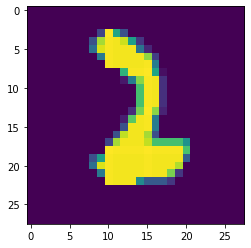

In [262]:
i = 1799
draw_predict(x_val[i],y_val[i])

In [241]:
x_val[100].shape

(784,)

In [198]:
net.weightGrads[1]

array([[0.14981359, 0.15375382, 0.1635904 , ..., 0.17911038, 0.03799643,
        0.03915757],
       [0.12515556, 0.1286733 , 0.13928758, ..., 0.1483915 , 0.03251546,
        0.03141588],
       [0.13802227, 0.13636732, 0.13062805, ..., 0.14717411, 0.04340535,
        0.0313735 ],
       ...,
       [0.11275544, 0.12091068, 0.1161254 , ..., 0.13023194, 0.03467181,
        0.0265118 ],
       [0.14813767, 0.15614378, 0.16531486, ..., 0.17855703, 0.04075845,
        0.03959459],
       [0.16223885, 0.16954849, 0.17278738, ..., 0.19210465, 0.04452176,
        0.04029611]])